# LINEAR REGRESSION USING SKLEARN DIABETES DATASET

Ten variables, age, sex, body mass index, average blood pressure, and 
six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, 
a quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

Number of Instances
442

Number of Attributes
First 10 columns are numeric predictive values

Target
Column 11 is a quantitative measure of disease progression one year after baseline

Attribute Information
age age in years

sex

bmi body mass index

bp average blood pressure

s1 tc, total serum cholesterol

s2 ldl, low-density lipoproteins

s3 hdl, high-density lipoproteins

s4 tch, total cholesterol / HDL

s5 ltg, possibly log of serum triglycerides level

s6 glu, blood sugar level

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

In [53]:
#importing the libraries

import pandas as pd  # data manipulation and analysis.
import numpy as np   #mathematical computing.
import sklearn       #machine learning 

In [14]:
%matplotlib inline  


In [15]:
import seaborn as sns #interactive visualization 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt #plotting & visualization.
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [56]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [7]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [8]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
diabetes.data.shape

(442, 10)

In [10]:
diabetes.target.shape

(442,)

In [35]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
dia_df = pd.DataFrame(diabetes.data,columns=diabetes.feature_names)

In [12]:
#to display a sample of the dataframe

dia_df.sample(10) 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
281,-0.092695,0.050680,-0.090275,-0.057314,-0.024960,-0.030437,-0.006584,-0.002592,0.024053,0.003064
313,0.059871,0.050680,0.053074,0.052858,0.032830,0.019667,-0.010266,0.034309,0.055205,-0.001078
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096433,-0.034215
108,0.019913,0.050680,0.045529,0.029906,-0.062111,-0.055802,-0.072854,0.026929,0.045601,0.040343
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064
67,0.041708,0.050680,-0.014828,-0.017147,-0.005697,0.008394,-0.013948,-0.001854,-0.011901,0.003064
180,-0.038207,0.050680,0.004572,0.035644,-0.011201,0.005889,-0.047082,0.034309,0.016305,-0.001078
372,-0.027310,0.050680,-0.023451,-0.015999,0.013567,0.012778,0.026550,-0.002592,-0.010904,-0.021788
235,0.067136,0.050680,-0.014828,0.058596,-0.059359,-0.034508,-0.061809,0.012906,-0.005145,0.048628


In [23]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
age    442 non-null float64
sex    442 non-null float64
bmi    442 non-null float64
bp     442 non-null float64
s1     442 non-null float64
s2     442 non-null float64
s3     442 non-null float64
s4     442 non-null float64
s5     442 non-null float64
s6     442 non-null float64
dtypes: float64(10)
memory usage: 34.6 KB


In [25]:
corr = dia_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


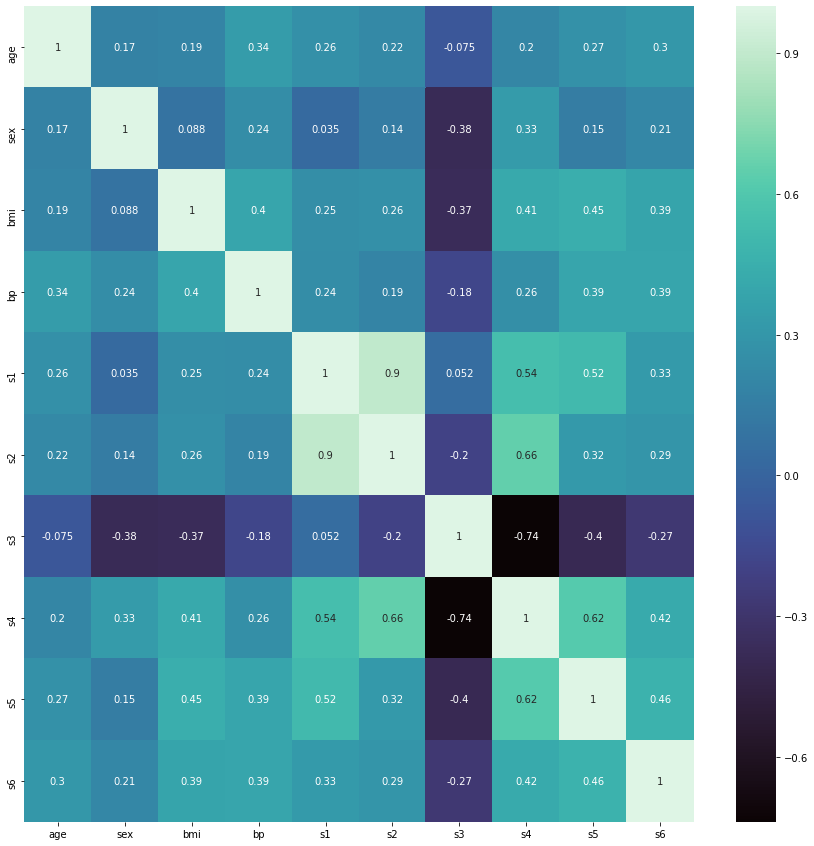

In [30]:
plt.subplots(figsize=(15,15))
sns.heatmap(corr,cmap= 'mako',annot=True)
plt.show()

In [32]:
dia_df['Progression'] = diabetes.target

In [34]:
dia_df.sample(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
411,0.005383,-0.044642,0.058463,-0.043542,-0.073119,-0.072399,0.019187,-0.076395,-0.051401,-0.025930,136.0
345,0.081666,0.050680,-0.002973,-0.033214,0.042462,0.057871,-0.010266,0.034309,-0.000609,-0.001078,139.0
19,-0.027310,-0.044642,-0.018062,-0.040099,-0.002945,-0.011335,0.037595,-0.039493,-0.008944,-0.054925,168.0
35,0.048974,0.050680,-0.030996,-0.049280,0.049341,-0.004132,0.133318,-0.053516,0.021311,0.019633,102.0
223,-0.099961,-0.044642,-0.023451,-0.064199,-0.057983,-0.060186,0.011824,-0.039493,-0.018118,-0.050783,150.0


In [36]:
dia_df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [37]:
dia_df.isna().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
Progression    0
dtype: int64

In [33]:
#independent variables
x = dia_df.drop(labels='Progression', axis=1)  #axis = 1 => drop data by column.

#dependent variable or traget variable
y = dia_df['Progression']

In [61]:
#splitting the dataset into 75%-25% train-test split 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.25,random_state=999)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(331, 10)
(111, 10)
(331,)
(111,)


In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [40]:
print(lm)
print(type(lm))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
<class 'sklearn.linear_model.base.LinearRegression'>


In [41]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predicted_y = lm.predict(test_x)

In [43]:
from sklearn import metrics as mt

In [54]:
print("1) The model explains,", np.round(mt.explained_variance_score(test_y,predicted_y)*100,3),"% variance of the target w.r.t features is")
print("2) The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(test_y,predicted_y ),3))
print("3) The R-Square score of the model is " , np.round(mt.r2_score(test_y,predicted_y),3))

1) The model explains, 57.569 % variance of the target w.r.t features is
2) The Mean Absolute Error of model is: 38.081
3) The R-Square score of the model is  0.559


In [50]:
coeff = pd.Series(lm.coef_, index = train_x.columns)
intercept = lm.intercept_

In [51]:
print("Coefficients:\n")
print(coeff)
print("\n")
print("Intercept:\n")
print(intercept)
print("\n")

Coefficients:

age     54.820535
sex   -260.930304
bmi    458.001802
bp     303.502332
s1    -995.584889
s2     698.811401
s3     183.095229
s4     185.698494
s5     838.503887
s6      96.441048
dtype: float64


Intercept:

154.42752615353518


